<a href="https://colab.research.google.com/github/li-hao-/ColabPlayground/blob/main/StockWavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install yfinance
#!pip install "git+https://github.com/aaren/wavelets"

In [ ]:
ticker_name = 'AAPL'

In [ ]:
import datetime
import time

def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

In [ ]:
import yfinance as yf
import pandas as pd

ticker = yf.Ticker(ticker_name)
data = ticker.history(period='max')

In [ ]:
#only keep adj close
df = data.loc[:, ['Close']]
df.rename(columns={'Close':'adj_close'}, inplace=True)
#create column simple return
df['simple_rtn'] = df.adj_close.pct_change()
#create column logrithmic returns
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
print(df)

                            adj_close  simple_rtn   log_rtn
Date                                                       
1980-12-12 00:00:00-05:00    0.099874         NaN       NaN
1980-12-15 00:00:00-05:00    0.094663   -0.052170 -0.053581
1980-12-16 00:00:00-05:00    0.087715   -0.073398 -0.076231
1980-12-17 00:00:00-05:00    0.089886    0.024751  0.024450
1980-12-18 00:00:00-05:00    0.092492    0.028992  0.028580
...                               ...         ...       ...
2022-11-09 00:00:00-05:00  134.869995   -0.033190 -0.033753
2022-11-10 00:00:00-05:00  146.869995    0.088975  0.085236
2022-11-11 00:00:00-05:00  149.699997    0.019269  0.019085
2022-11-14 00:00:00-05:00  148.279999   -0.009486 -0.009531
2022-11-15 00:00:00-05:00  150.039993    0.011869  0.011800

[10572 rows x 3 columns]


In [ ]:
from sklearn import preprocessing

time = [year_fraction(ts.to_pydatetime()) for ts in df.index.tolist()]
sst = df['log_rtn'].values.tolist()
del time[0]
del sst[0]

In [ ]:
import numpy as np
import pywt

# time, sst = pywt.data.nino()
dt = time[1] - time[0]

# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 365)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
levels = [v/365 for v in levels]

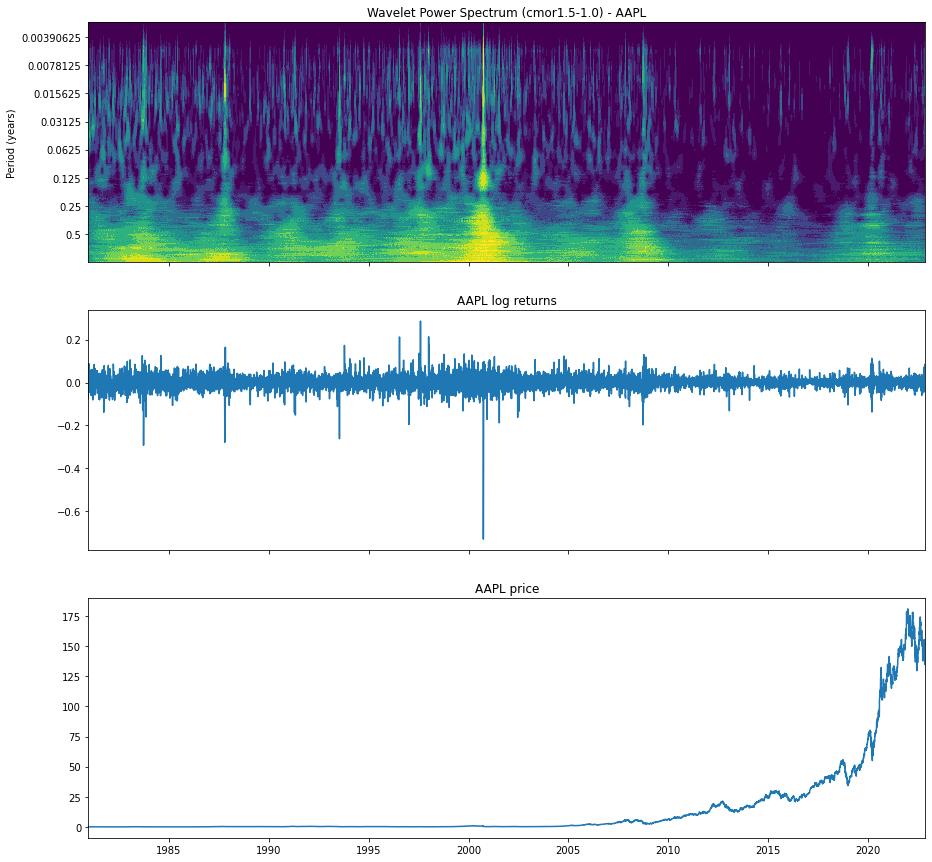

In [ ]:
import matplotlib.pyplot as plt

f, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(15, 15))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title('Wavelet Power Spectrum (%s) - %s' % (wavelet, ticker_name))
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
# ylim = ax.get_ylim()
# ax.set_ylim(ylim[0], -1)

y = df['log_rtn'].values.tolist()
del y[0]
ax2.set_title(ticker_name + ' log returns')
ax2.plot(time, y)

y2 = data['Close'].values.tolist()
del y2[0]
ax3.set_title(ticker_name + ' price')
ax3.plot(time, y2)

plt.show()